In [11]:
from rlway.schedules import Schedule

In [12]:
schedule = Schedule(6, 3)

schedule.df.at[0, 0] = [0, 1]
schedule.df.at[2, 0] = [1, 2]
schedule.df.at[3, 0] = [2, 3]
schedule.df.at[4, 0] = [3, 4]

schedule.df.at[1, 1] = [1, 2]
schedule.df.at[2, 1] = [2, 3]
schedule.df.at[3, 1] = [3, 4]
schedule.df.at[5, 1] = [4, 5]

schedule.df.at[0, 2] = [2, 3]
schedule.df.at[2, 2] = [3, 4]
schedule.df.at[3, 2] = [4, 5]
schedule.df.at[4, 2] = [5, 6]

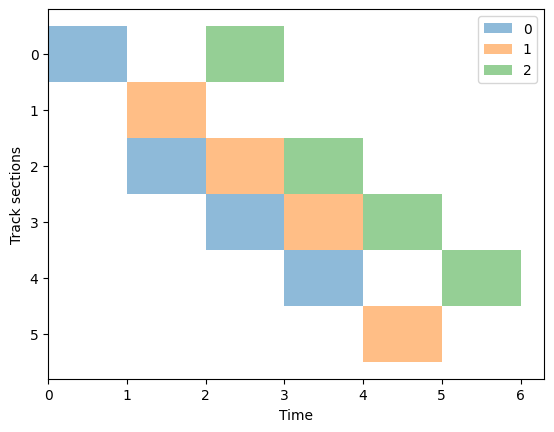

In [13]:
schedule.plot()

In [14]:
schedule.df

0         1         2     
     s    e    s    e    s    e
0    0    1  NaN  NaN    2    3
1  NaN  NaN    1    2  NaN  NaN
2    1    2    2    3    3    4
3    2    3    3    4    4    5
4    3    4  NaN  NaN    5    6
5  NaN  NaN    4    5  NaN  NaN

In [15]:
three_trains = schedule

In [16]:
three_trains.shift_train_after(0, 2, 0).df[0]

,s,e
0,3.0,4.0
1,NaN,NaN
2,4.0,5.0
3,5.0,6.0
4,6.0,7.0
5,NaN,NaN


In [17]:
import pandas as pd

In [18]:
schedule2x2 = Schedule(2, 2)
schedule2x2.set(0, 0, [0., 1.])
assert schedule2x2._df.loc[0, 0].values.tolist() == [0., 1.]

In [19]:
from pandas.testing import assert_frame_equal
assert_frame_equal(schedule2x2._df, schedule2x2.df)

In [20]:
schedule.lengths

,0,1,2
0,1.0,NaN,1.0
1,NaN,1.0,NaN
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,NaN,1.0
5,NaN,1.0,NaN


In [21]:
import numpy as np

In [23]:
expected = pd.DataFrame(
    {
        0: [0, np.nan, 1, 2, 3, np.nan],
        1: [np.nan, 1, 2, 3, np.nan, 4],
        2: [2, np.nan, 3, 4, 5, np.nan],
    },
    # dtype=floa
)

assert_frame_equal(schedule.starts, expected)

In [24]:
three_trains = schedule

In [25]:
assert three_trains.trajectory(0) == [0, 2, 3, 4]
assert three_trains.trajectory(1) == [1, 2, 3, 5]
assert three_trains.trajectory(2) == [0, 2, 3, 4]

In [26]:
two_trains = Schedule(6, 2)

two_trains.df.at[0, 0] = [0, 1]
two_trains.df.at[2, 0] = [1, 2]
two_trains.df.at[3, 0] = [2, 3]
two_trains.df.at[4, 0] = [3, 4]

two_trains.df.at[1, 1] = [1, 2]
two_trains.df.at[2, 1] = [2, 3]
two_trains.df.at[3, 1] = [3, 4]
two_trains.df.at[5, 1] = [4, 5]

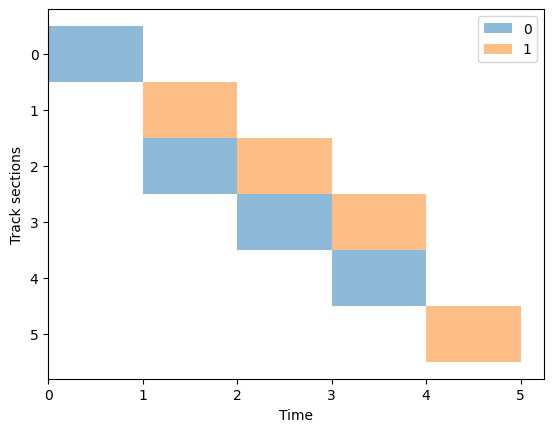

In [27]:
two_trains.plot()

In [28]:
for i in two_trains.track_sections:
    print(two_trains.is_a_point_switch(0, 1, i),
          two_trains.is_just_after_a_point_switch(0, 1, i))

False False
False False
True False
False True
False False
False False


In [29]:
two_trains.shift_train_departure(0, 2)

     0         1     
     s    e    s    e
0    2    3  NaN  NaN
1  NaN  NaN    1    2
2    3    4    2    3
3    4    5    3    4
4    5    6  NaN  NaN
5  NaN  NaN    4    5

In [30]:
two_trains.shift_train_departure(0, 2).df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   s       4 non-null      object
 1   e       4 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [31]:
pd.DataFrame([
        [2, 3],
        [np.nan, np.nan],
        [3, 4],
        [4, 5],
        [5, 6],
        [np.nan, np.nan]
    ])

,0,1
0,2.0,3.0
1,NaN,NaN
2,3.0,4.0
3,4.0,5.0
4,5.0,6.0
5,NaN,NaN


In [32]:
assert_frame_equal(two_trains.df[1], two_trains.shift_train_after(0,1,2).df[1])

In [33]:
two_trains.shift_train_after(0, 1, 2).df[0].values

array([[0, 3.0],
       [nan, nan],
       [3.0, 4.0],
       [4.0, 5.0],
       [5.0, 6.0],
       [nan, nan]], dtype=object)

In [34]:
{
    u: v
    for u, v in zip(two_trains.df.index, two_trains.df.fillna(0).values)
}

{0: array([0, 1, 0, 0]),
 1: array([0, 0, 1, 2]),
 2: array([1, 2, 2, 3]),
 3: array([2, 3, 3, 4]),
 4: array([3, 4, 0, 0]),
 5: array([0, 0, 4, 5])}

In [35]:
import networkx as nx

G = nx.DiGraph([
    (0, 2),
    (1, 2),
    (2, 3),
    (3, 4),
    (3, 5)
])

nx.set_node_attributes(
    G,
    {
        0: np.array([0, 1, 0, 0]),
        1: np.array([0, 0, 1, 2]),
        2: np.array([1, 2, 2, 3]),
        3: np.array([2, 3, 3, 4]),
        4: np.array([3, 4, 0, 0]),
        5: np.array([0, 0, 4, 5]),
    },
    'times'
)


In [36]:
from networkx.utils import nodes_equal, edges_equal, graphs_equal

assert nodes_equal(G.nodes, two_trains.graph.nodes)
assert edges_equal(G.edges, two_trains.graph.edges)

In [37]:
G.nodes

NodeView((0, 2, 1, 3, 4, 5))

In [38]:
two_trains

     0         1     
     s    e    s    e
0    0    1  NaN  NaN
1  NaN  NaN    1    2
2    1    2    2    3
3    2    3    3    4
4    3    4  NaN  NaN
5  NaN  NaN    4    5

In [39]:
two_trains.__repr__()

'     0         1     \n     s    e    s    e\n0    0    1  NaN  NaN\n1  NaN  NaN    1    2\n2    1    2    2    3\n3    2    3    3    4\n4    3    4  NaN  NaN\n5  NaN  NaN    4    5'

In [40]:
s = Schedule(1, 1)
s.set(0,0, [1,2])

assert s.__repr__() == \
"""   0   
   s  e
0  1  2"""

In [52]:
two_trains.add_delay(0, 0, 0.5).conflicts(1)

,0
0,NaN
1,NaN
2,1.5
3,2.5
4,NaN
5,NaN


In [51]:
pd.DataFrame(
            {1: [np.nan, np.nan, 2, 3, np.nan, np.nan]},
        )

,1
0,NaN
1,NaN
2,2.0
3,3.0
4,NaN
5,NaN


In [98]:
two_trains.add_delay(0, 0, 0.5).earliest_conflict()
import copy

random_sorted = copy.deepcopy(two_trains.add_delay(0, 0, .5))
random_sorted._df = random_sorted.df.sample(frac=1)
assert_frame_equal(random_sorted.sort().df.sort_index(), two_trains.add_delay(0, 0, .5).df)


In [103]:
delayed_schedule = two_trains.shift_train_departure(0, 3).add_delay(1, 1, .5)

In [106]:
delayed_schedule.total_delay_at_stations(two_trains, [4, 5])

3.5

In [105]:
two_trains.df[0,'s']

0      0
1    NaN
2      1
3      2
4      3
5    NaN
Name: (0, s), dtype: object

In [115]:
assert three_trains.add_delay(0, 0, .5).is_action_needed(train=0)
assert three_trains.add_delay(0, 2, .5).is_action_needed(train=0)
assert three_trains.add_delay(0, 3, .5).is_action_needed(train=0)
assert not three_trains.add_delay(0, 4, .5).is_action_needed(train=0)

assert three_trains.add_delay(0, 2, .5).is_action_needed(train=1)
assert not three_trains.add_delay(0, 2, .5).is_action_needed(train=2)

AssertionError: 

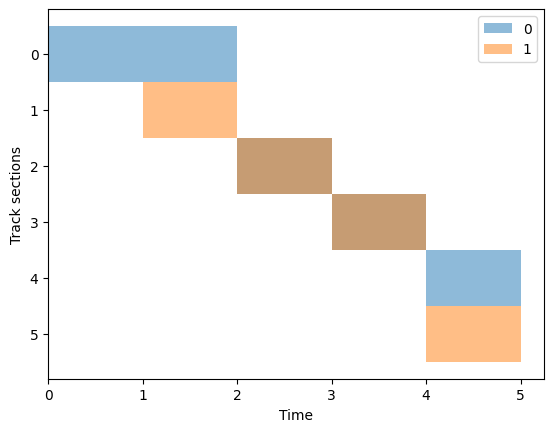

In [124]:
delayed_schedule = two_trains.add_delay(0, 0, 1)
delayed_schedule.plot()

In [125]:
delayed_schedule.first_in(0, 1, 2)

[0, 1]

In [123]:
for track_section in (1, 2, 3, 5):
    print(
        two_trains.add_delay(0, 1, 1.5)
        .first_in(0, 1, track_section)
        # == 1
    )

1
0
0
1


In [126]:
import matplotlib.pyplot as plt


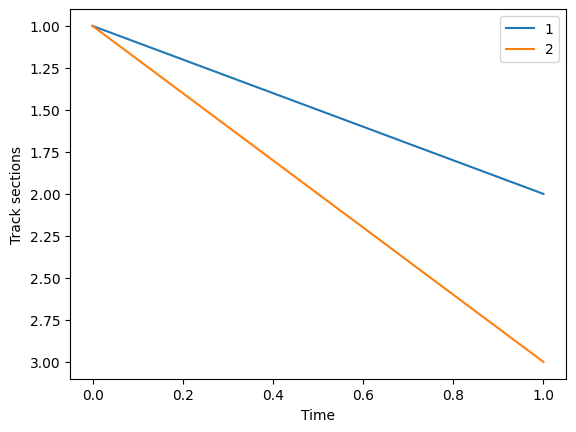

In [146]:
fig, ax = plt.subplots()
ax.plot([0, 1], [1, 2], label='1')
ax.plot([0, 1], [1, 3], label='2')
ax.invert_yaxis()
ax.set_xlabel('Time')
ax.set_ylabel('Track sections')
ax.legend()

In [147]:
%load_ext autoreload
%autoreload 2

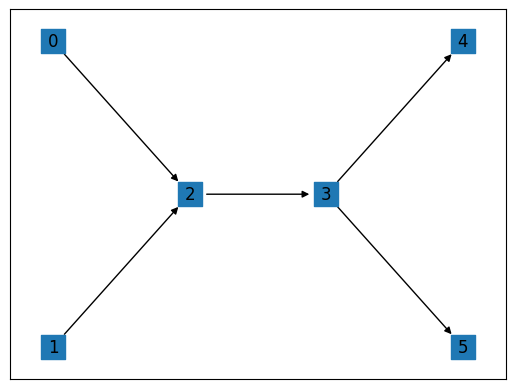

In [189]:
ax = two_trains.draw_graph()

In [198]:
import matplotlib
for node in two_trains.graph.nodes:
    assert str(node) in [text._text for text in ax.get_children() if isinstance(text, matplotlib.text.Text)]

In [196]:
two_trains.graph.nodes

NodeView((2, 3, 0, 1, 4, 5))

In [194]:
[type(e) for e in ax.get_children()]

[matplotlib.collections.PathCollection,
 matplotlib.patches.FancyArrowPatch,
 matplotlib.patches.FancyArrowPatch,
 matplotlib.patches.FancyArrowPatch,
 matplotlib.patches.FancyArrowPatch,
 matplotlib.patches.FancyArrowPatch,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.spines.Spine,
 matplotlib.spines.Spine,
 matplotlib.spines.Spine,
 matplotlib.spines.Spine,
 matplotlib.axis.XAxis,
 matplotlib.axis.YAxis,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.text.Text,
 matplotlib.patches.Rectangle]

In [183]:
len(ax.get_children())

23

In [184]:
len([rectangle for rectangle in ax.get_children()])

23

In [206]:
two_trains_two_blocks_before_dvg = Schedule(7, 2)

two_trains_two_blocks_before_dvg.df.at[0, 0] = [0, 1]
two_trains_two_blocks_before_dvg.df.at[2, 0] = [1, 2]
two_trains_two_blocks_before_dvg.df.at[3, 0] = [2, 3]
two_trains_two_blocks_before_dvg.df.at[4, 0] = [3, 4]
two_trains_two_blocks_before_dvg.df.at[5, 0] = [4, 5]

two_trains_two_blocks_before_dvg.df.at[1, 1] = [1, 2]
two_trains_two_blocks_before_dvg.df.at[2, 1] = [2, 3]
two_trains_two_blocks_before_dvg.df.at[3, 1] = [3, 4]
two_trains_two_blocks_before_dvg.df.at[4, 1] = [4, 5]
two_trains_two_blocks_before_dvg.df.at[6, 1] = [5, 6]

<Axes: xlabel='Time', ylabel='Track sections'>

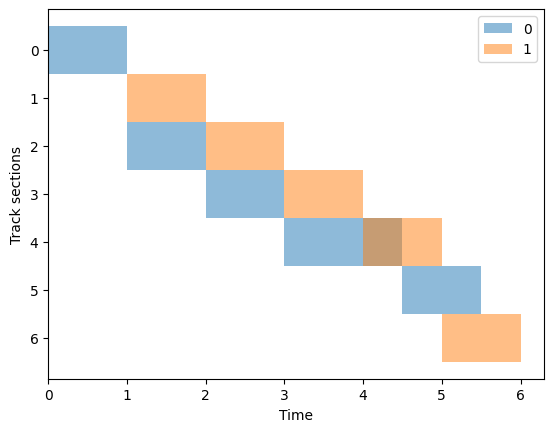

In [211]:
two_trains_two_blocks_before_dvg.add_delay(0, 4, 0.5).plot()

In [226]:
two_trains_two_blocks_before_dvg.add_delay(0, 4, 0.5).propagate_delay(0)[0].ends

,0,1
0,1.0,NaN
1,NaN,2.0
2,2.0,3.0
3,3.0,4.5
4,4.5,5.5
5,5.5,NaN
6,NaN,6.5


In [225]:
two_trains_two_blocks_before_dvg.ends

,0,1
0,1.0,NaN
1,NaN,2.0
2,2.0,3.0
3,3.0,4.0
4,4.0,5.0
5,5.0,NaN
6,NaN,6.0
